In [185]:
import ToolBox as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


In [186]:
df_lol = pd.read_csv ('Data_2/lol.csv')
df_lol = df_lol.drop ('gameId', axis=1)

In [187]:
# Pasando el target binario a categorica
df_lol ['blueWins'] = df_lol['blueWins'].replace({0: 'derrota', 1: 'victoria'})

In [188]:
tb.describe_df (df_lol)

blueWins blueWardsPlaced blueWardsDestroyed blueFirstBlood  \
DATA_TYPE       object           int64              int64          int64   
MISSINGS (%)       0.0             0.0                0.0            0.0   
UNIQUE_VALUES        2             147                 27              2   
CARDIN (%)        0.02            1.49               0.27           0.02   

              blueKills blueDeaths blueAssists blueEliteMonsters blueDragons  \
DATA_TYPE         int64      int64       int64             int64       int64   
MISSINGS (%)        0.0        0.0         0.0               0.0         0.0   
UNIQUE_VALUES        21         21          30                 3           2   
CARDIN (%)         0.21       0.21         0.3              0.03        0.02   

              blueHeralds  ... redTowersDestroyed redTotalGold redAvgLevel  \
DATA_TYPE           int64  ...              int64        int64     float64   
MISSINGS (%)          0.0  ...                0.0          0.0         0.0   
UNIQUE_VALUES           2  ...                  3         4732          18   
CARDIN (%)           0.02  ...               0.03         47.9        0.18   

              redTotalExperience redTotalMinionsKilled  \
DATA_TYPE                  int64                 int64   
MISSINGS (%)                 0.0                   0.0   
UNIQUE_VALUES               4113                   153   
CARDIN (%)                 41.63                  1.55   

              redTotalJungleMinionsKilled redGoldDiff redExperienceDiff  \
DATA_TYPE                           int64       int64             int64   
MISSINGS (%)                          0.0         0.0               0.0   
UNIQUE_VALUES                          75        6047              5356   
CARDIN (%)                           0.76       61.21             54.22   

              redCSPerMin redGoldPerMin  
DATA_TYPE         float64       float64  
MISSINGS (%)          0.0           0.0  
UNIQUE_VALUES         153          4732  
CARDIN (%)           1.55          47.9  

[4 rows x 39 columns]

In [189]:
tipo = tb.tipifica_variables (df_lol,10,30)

tipo

nombre_variable      tipo_sugerido
0                       blueWins            Binaria
1                blueWardsPlaced  Numérica Discreta
2             blueWardsDestroyed  Numérica Discreta
3                 blueFirstBlood            Binaria
4                      blueKills  Numérica Discreta
5                     blueDeaths  Numérica Discreta
6                    blueAssists  Numérica Discreta
7              blueEliteMonsters         Categórica
8                    blueDragons            Binaria
9                    blueHeralds            Binaria
10           blueTowersDestroyed         Categórica
11                 blueTotalGold  Numérica Continua
12                  blueAvgLevel  Numérica Discreta
13           blueTotalExperience  Numérica Continua
14        blueTotalMinionsKilled  Numérica Discreta
15  blueTotalJungleMinionsKilled  Numérica Discreta
16                  blueGoldDiff  Numérica Continua
17            blueExperienceDiff  Numérica Continua
18                  blueCSPerMin  Numérica Discreta
19                blueGoldPerMin  Numérica Continua
20                redWardsPlaced  Numérica Discreta
21             redWardsDestroyed  Numérica Discreta
22                 redFirstBlood            Binaria
23                      redKills  Numérica Discreta
24                     redDeaths  Numérica Discreta
25                    redAssists  Numérica Discreta
26              redEliteMonsters         Categórica
27                    redDragons            Binaria
28                    redHeralds            Binaria
29            redTowersDestroyed         Categórica
30                  redTotalGold  Numérica Continua
31                   redAvgLevel  Numérica Discreta
32            redTotalExperience  Numérica Continua
33         redTotalMinionsKilled  Numérica Discreta
34   redTotalJungleMinionsKilled  Numérica Discreta
35                   redGoldDiff  Numérica Continua
36             redExperienceDiff  Numérica Continua
37                   redCSPerMin  Numérica Discreta
38                 redGoldPerMin  Numérica Continua

In [190]:
tipo_filtrado = tipo[(tipo['tipo_sugerido'] == 'Binaria') | (tipo['tipo_sugerido'] == 'Categórica')]

categoricas_lol = tipo_filtrado ['nombre_variable']

categoricas_lol

0                blueWins
3          blueFirstBlood
7       blueEliteMonsters
8             blueDragons
9             blueHeralds
10    blueTowersDestroyed
22          redFirstBlood
26       redEliteMonsters
27             redDragons
28             redHeralds
29     redTowersDestroyed
Name: nombre_variable, dtype: object

In [191]:
df_lol.head (5)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0  derrota               28                   2               1          9   
1  derrota               12                   1               0          5   
2  derrota               15                   0               0          7   
3  derrota               43                   1               0          4   
4  derrota               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  ...  \
0           6           11                  0            0            0  ...   
1           5            5                  0            0            0  ...   
2          11            4                  1            1            0  ...   
3           5            5                  1            0            1  ...   
4           6            6                  0            0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 39 columns]

In [192]:
X = df_lol.drop ('blueWins', axis=1)
y = df_lol['blueWins']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression ()
model.fit(X_train, y_train)
pred = model.predict(X_test)

c:\Users\pobla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7226720647773279
Precision: 0.7226773226773227
Recall: 0.7226444726513879
Classification Report:
               precision    recall  f1-score   support

     derrota       0.72      0.72      0.72       983
    victoria       0.72      0.73      0.73       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



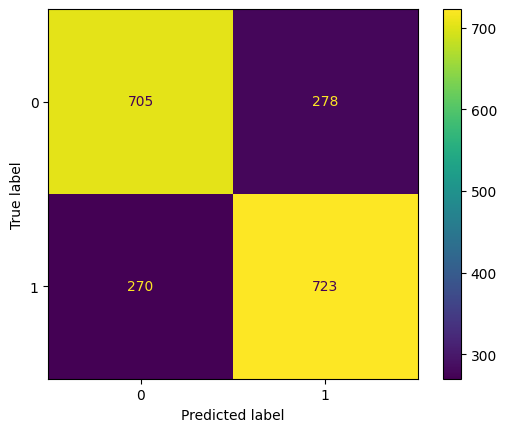

(0.7226720647773279, 0.7226773226773227, 0.7226444726513879)

In [193]:
tb.eval_model (y_test, pred, 'classification', ['ACCURACY', 'PRECISION', 'RECALL',  'CLASS_REPORT', 'MATRIX' ])

In [194]:
categoricas_lol = tipo_filtrado['nombre_variable'].tolist()
columns_to_drop = categoricas_lol[1:]

df_lol = df_lol.drop(columns=columns_to_drop, errors='ignore')

In [195]:
lista_func =  (tb.get_features_num_classification (df_lol, 'blueWins'))
lista_func

['blueWardsDestroyed',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redKills',
 'redDeaths',
 'redAssists',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [196]:
lista_origin = df_lol.columns

In [216]:
set1 = set(lista_origin)
set2 = set(lista_func)


diff1 = set1 - set2

diff2 = set2 - set1

differences = diff1.union(diff2)

print("Valores diferentes entre las dos listas:", differences)

# 'blueWardsPlaced' La unica variable con un pvalue menor de 0.05

Valores diferentes entre las dos listas: {'blueWins', 'blueWardsPlaced'}


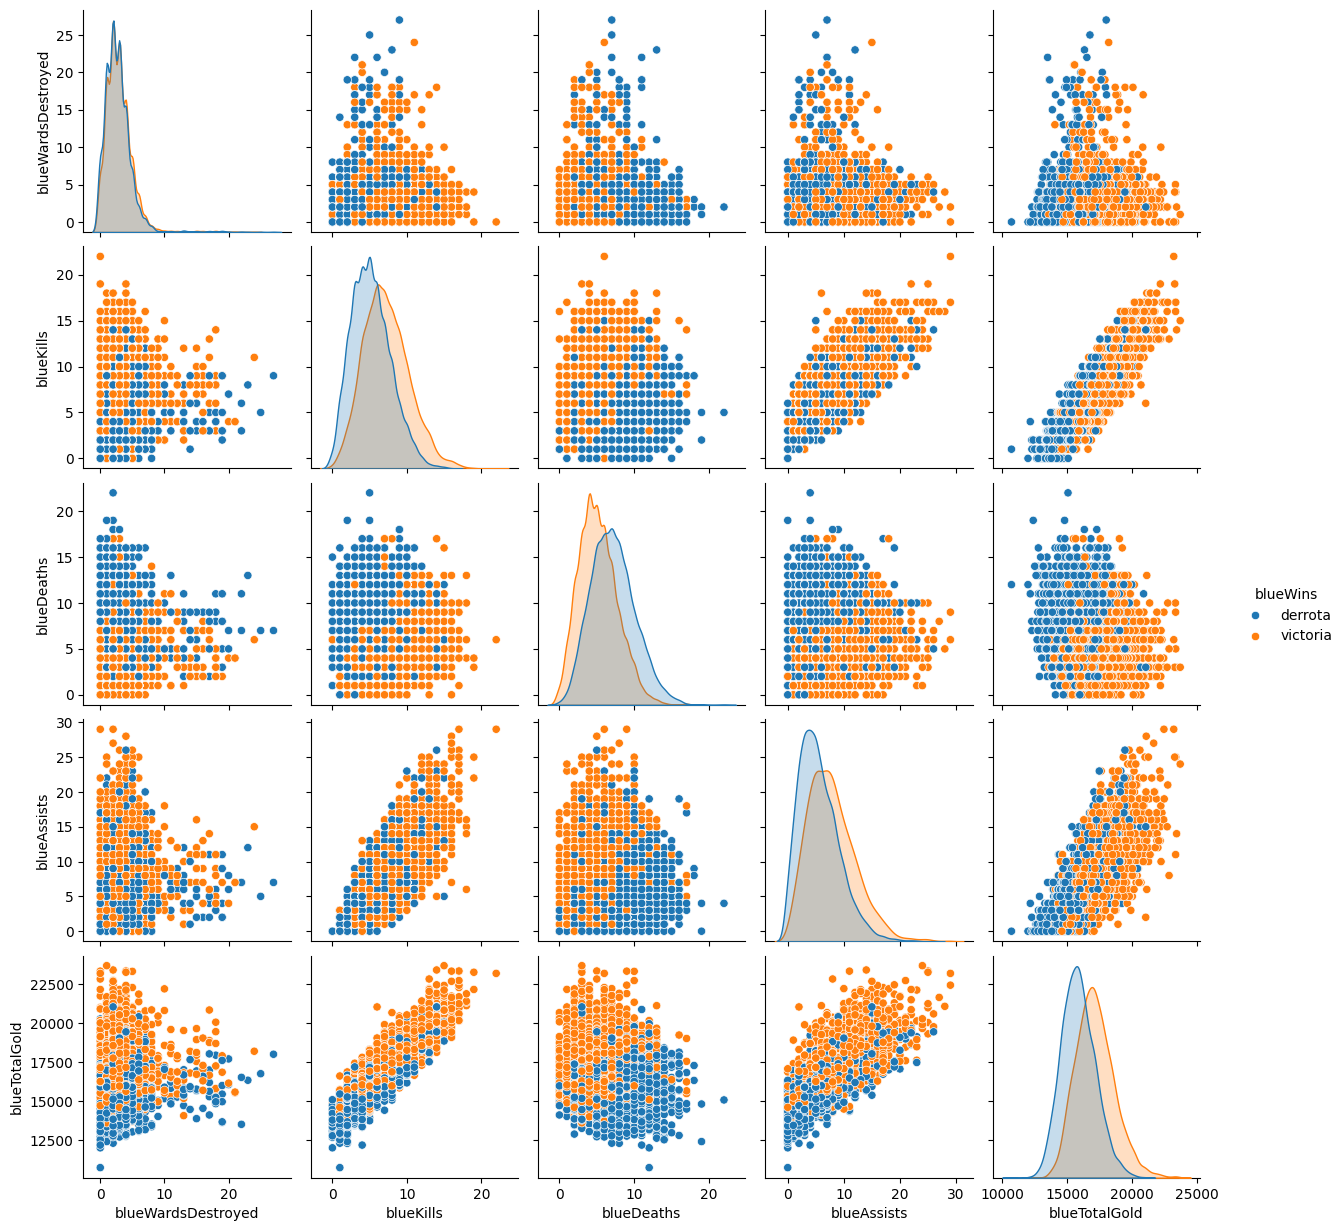

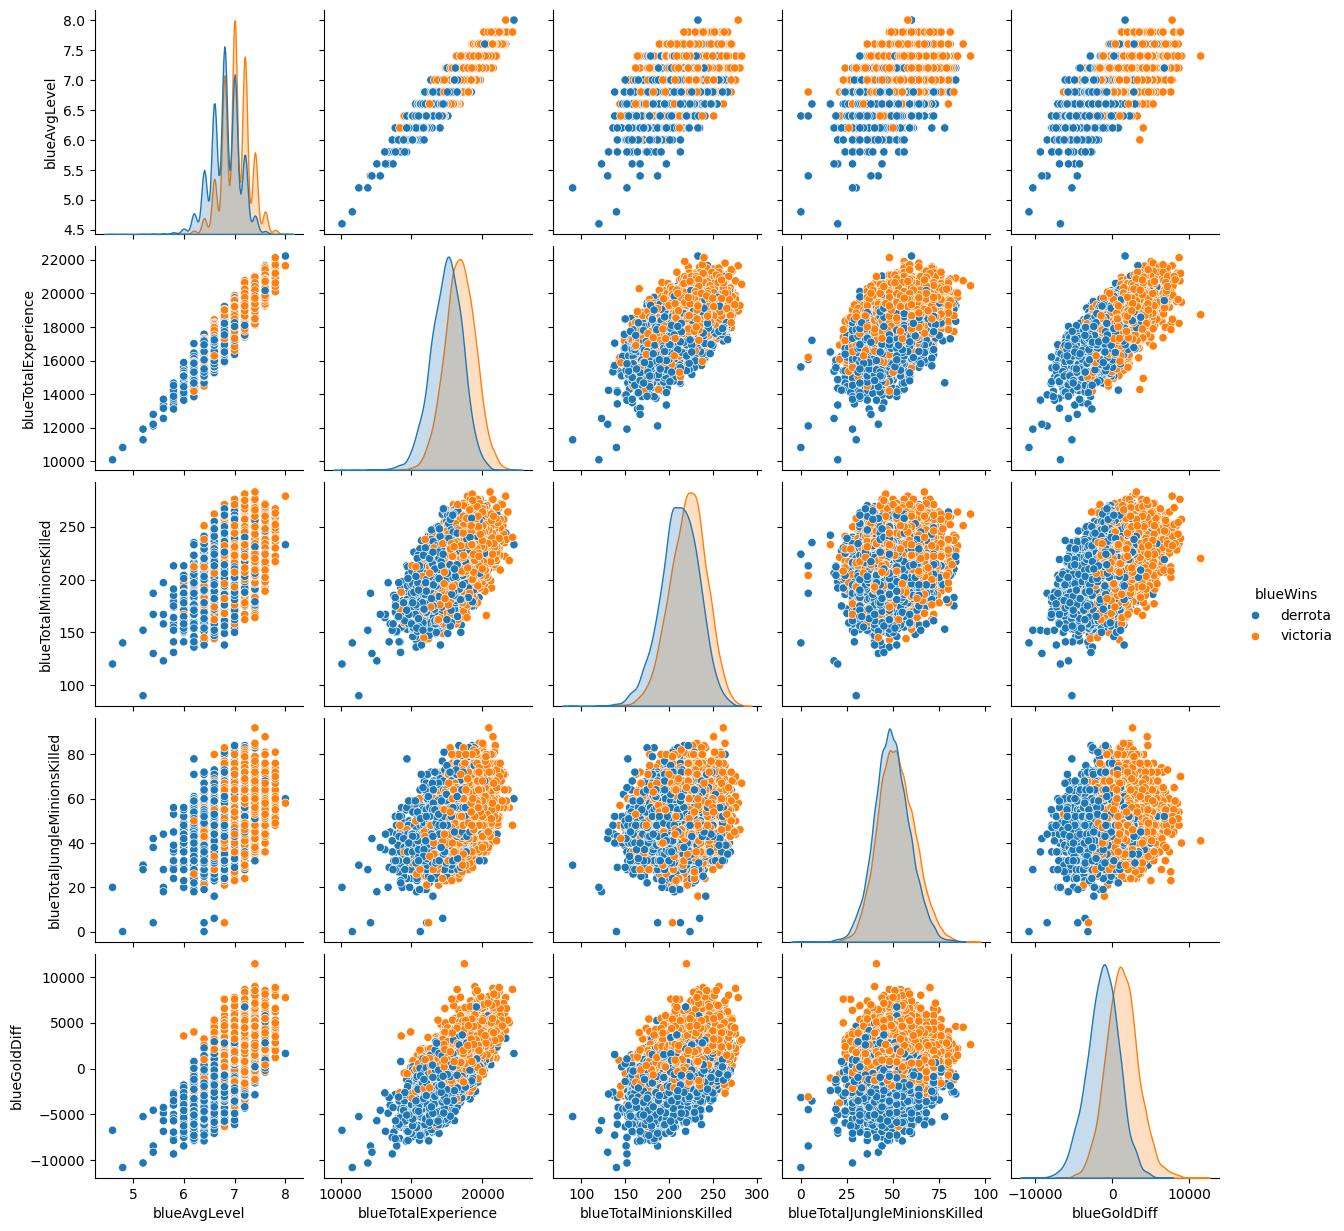

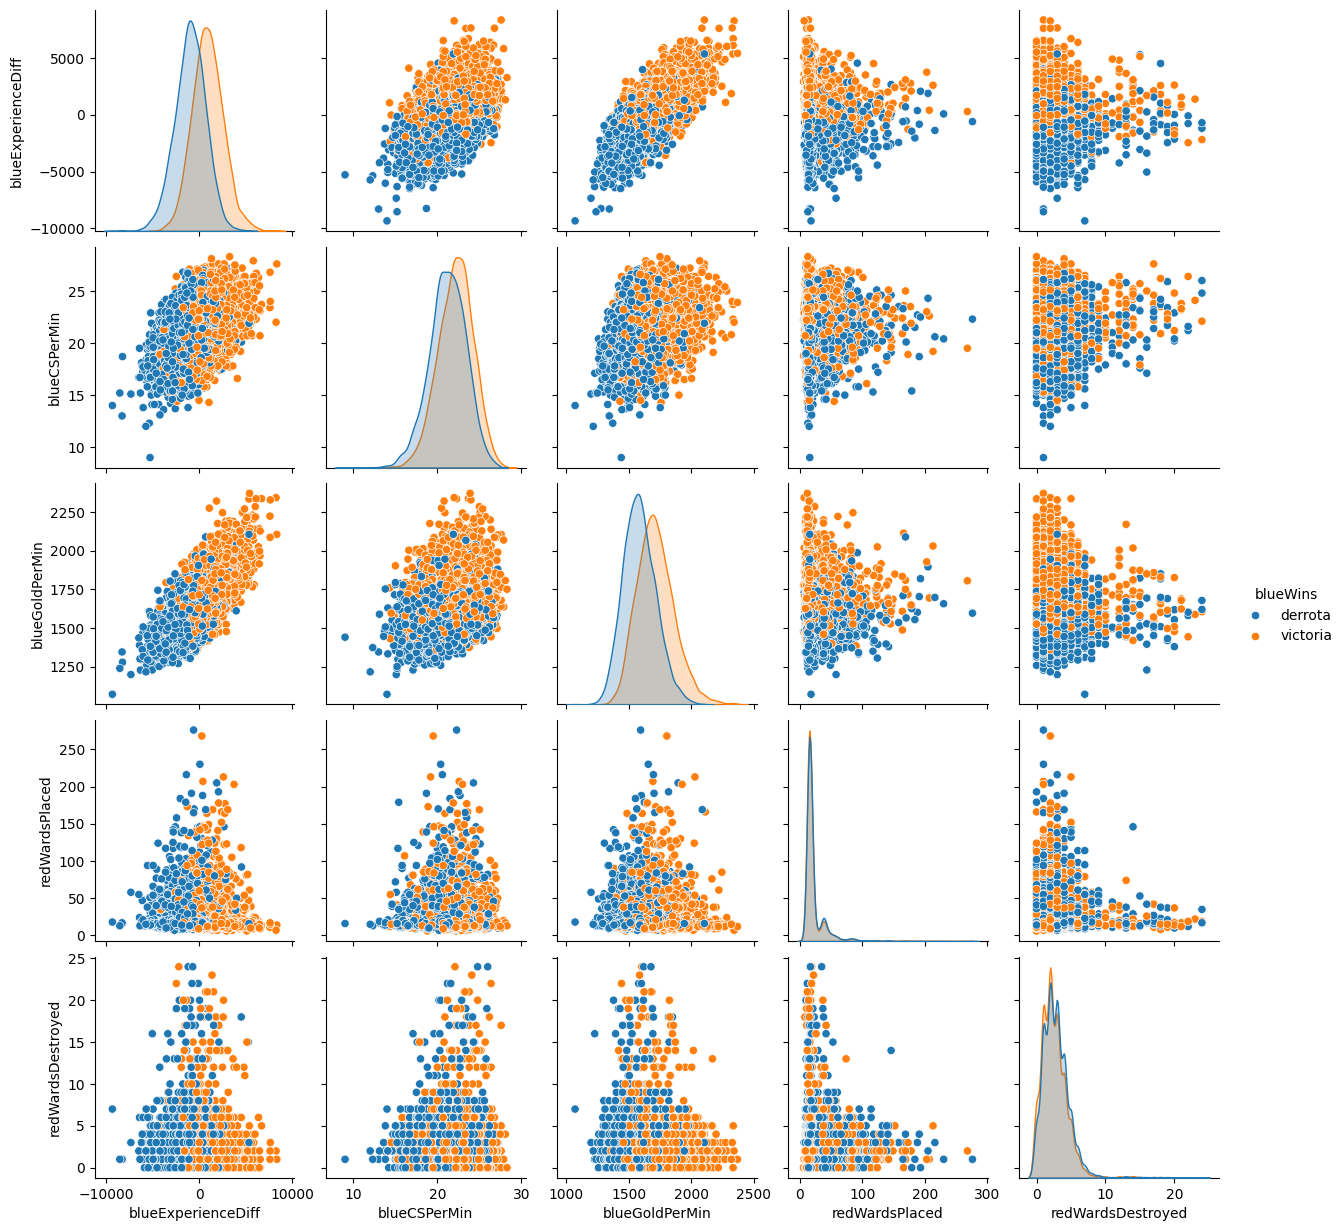

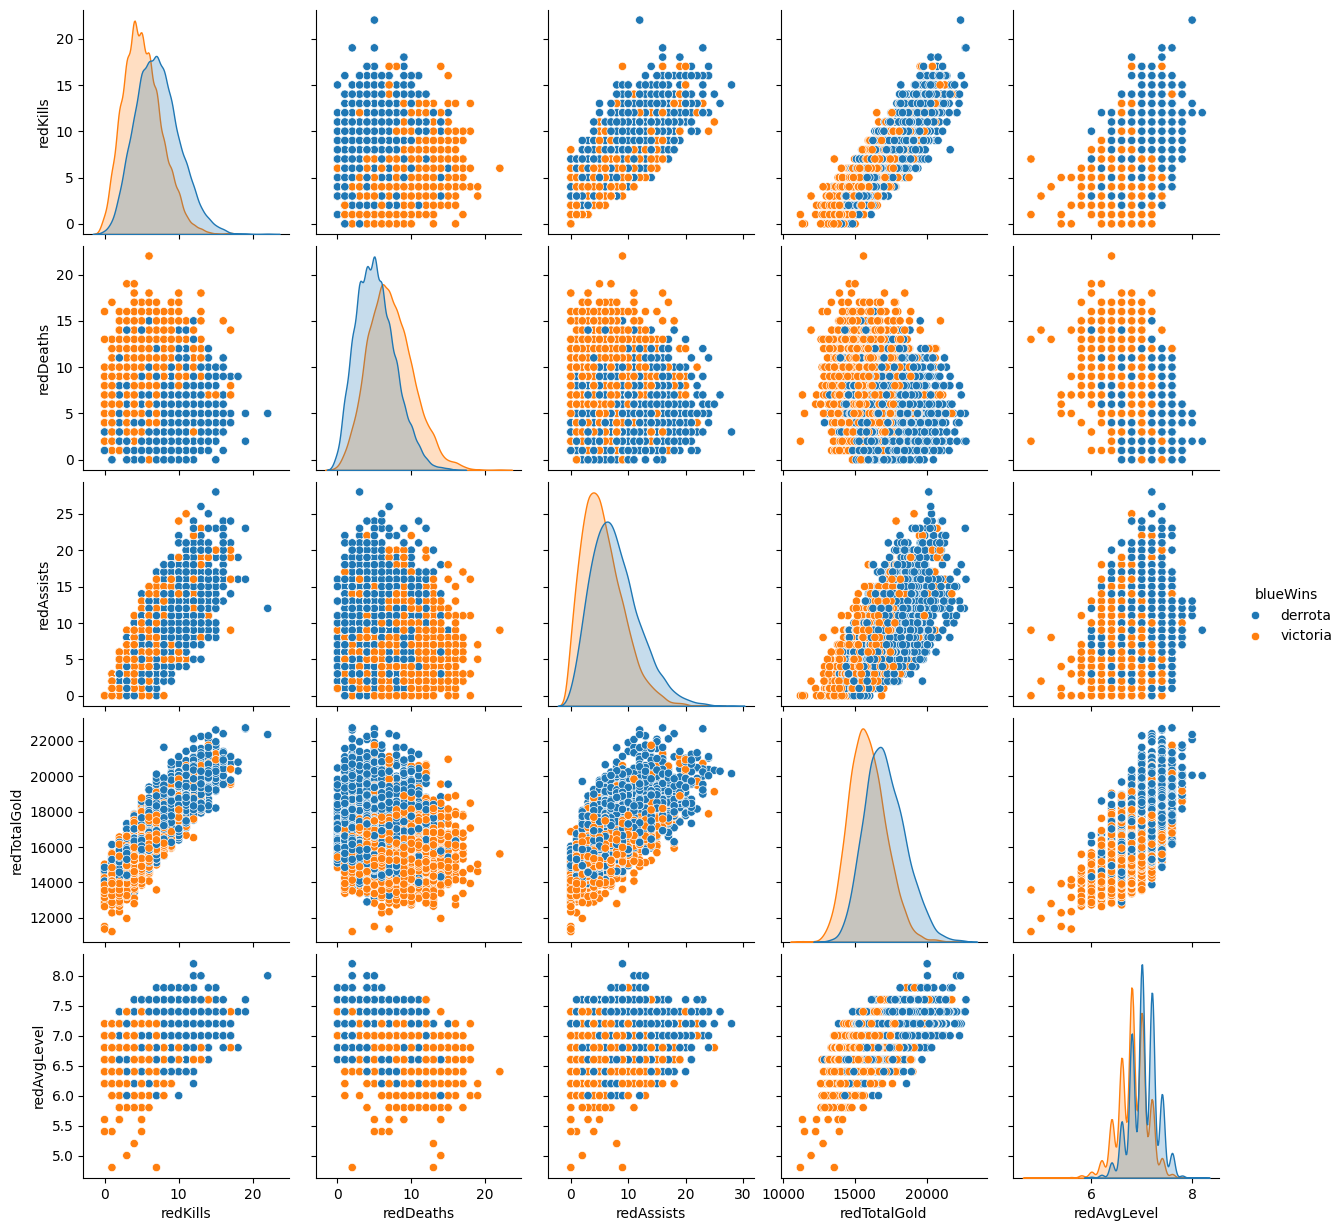

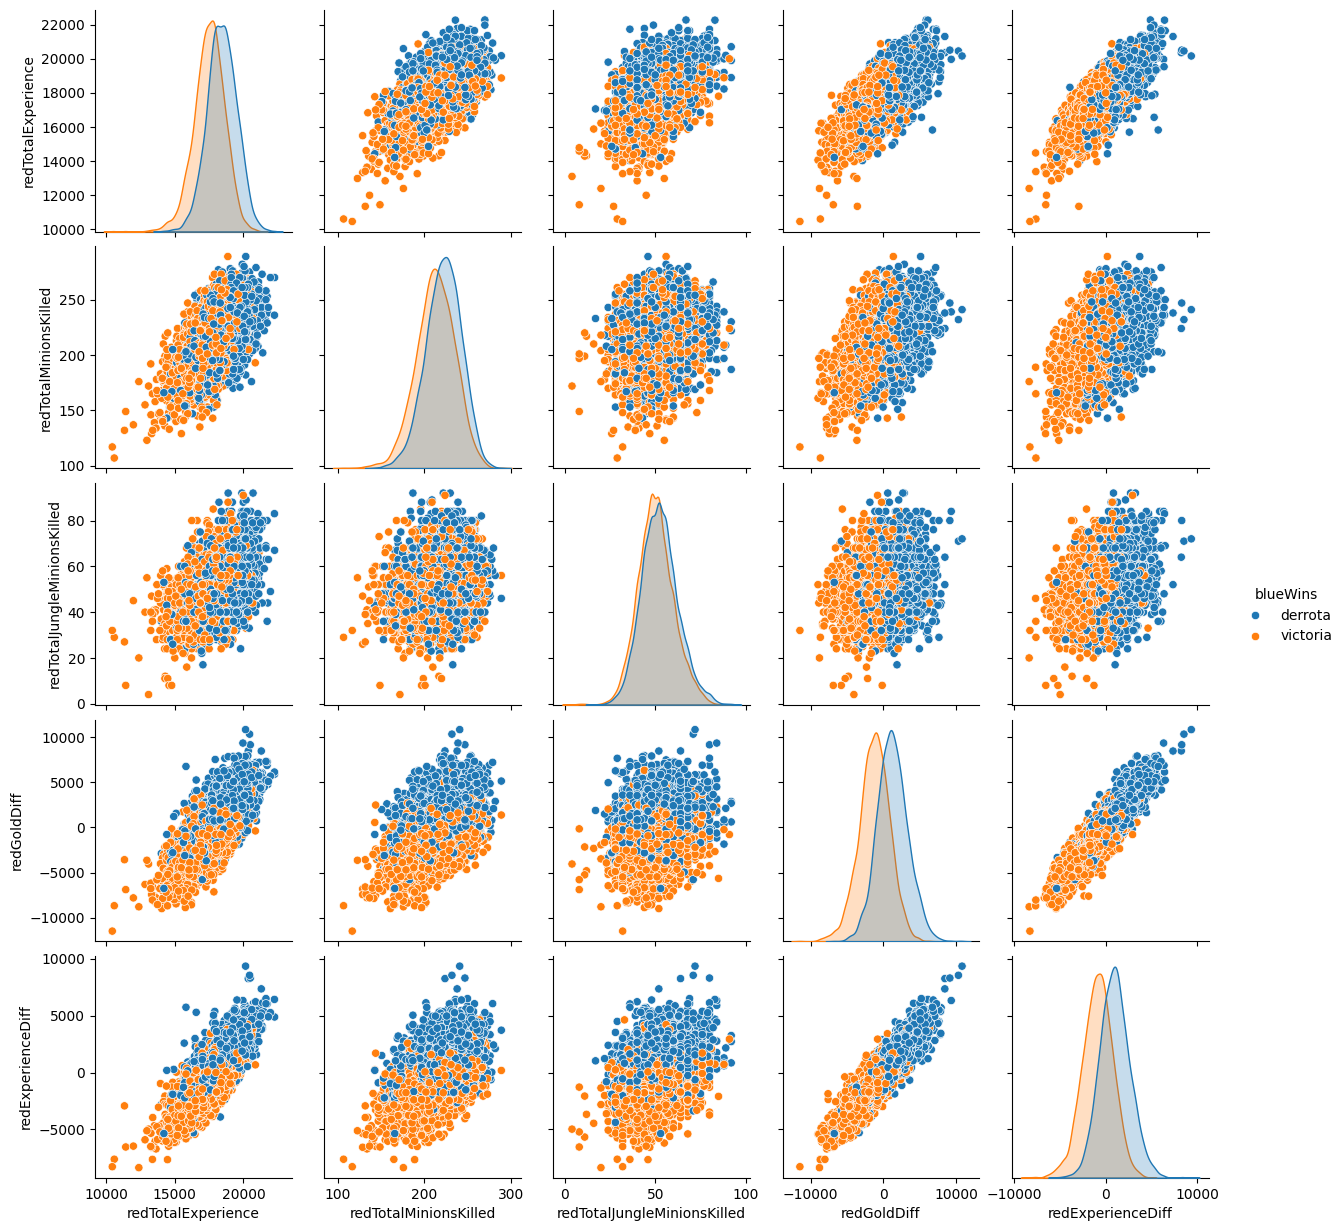

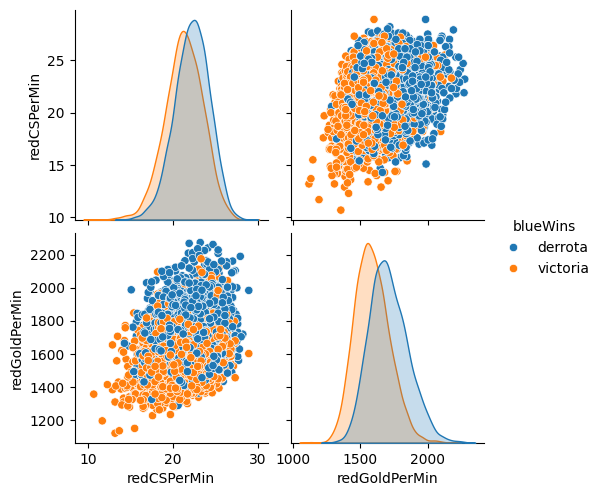

['blueWardsDestroyed',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redKills',
 'redDeaths',
 'redAssists',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [218]:
tb.plot_features_num_classification (df_lol, 'blueWins')

### Resumen:

Hasta ahora hemos utilizado las siguientes funciones:

TOOLBOX 1:
- describe_df
- tipifica_variables

TOOLBOX 2:
- eval_model con un modelo de clasificación.
- get_features_num_classification.
- plot_features_num_classification.

In [219]:
df_salarios= pd.read_csv ('Data_2/ds_salaries.csv')

In [200]:
df_salarios

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [201]:
df_salarios ['job_title'].count ()

3755

In [202]:
df_salarios ['job_title'].value_counts ()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [203]:
# Obtener el conteo de valores únicos en la columna 'job_title'
conteo_valores = df_salarios['job_title'].value_counts()

porcentaje_apariciones = conteo_valores / len(df_salarios) * 100

valores_filtrados = porcentaje_apariciones[porcentaje_apariciones > 1].index


df_salarios = df_salarios[df_salarios['job_title'].isin(valores_filtrados)]

In [204]:
# Filtrando ubicaciones.

ubicaciones_filtradas = df_salarios['company_location'].value_counts()[lambda x: x > 10].index.tolist()
df_salarios = df_salarios[df_salarios['company_location'].isin(ubicaciones_filtradas)]

In [205]:
# Agrupamiento de salarios (TARGET)

bins = [0, 30000, 50000, 75000, 100000, 150000, 200000, float('inf')]
labels = ['<30000', '30001-50000', '50001-75000', '75001-100000', '100001-150000', '150001-200000', '>200000']

df_salarios['rango_precio'] = pd.cut(df_salarios['salary_in_usd'], bins=bins, labels=labels, right=False)
df_salarios = df_salarios.drop (['salary_in_usd', 'salary', 'salary_currency'], axis=1)

In [206]:
tb.get_features_cat_classification (df_salarios, 'rango_precio')

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size',
 'rango_precio']

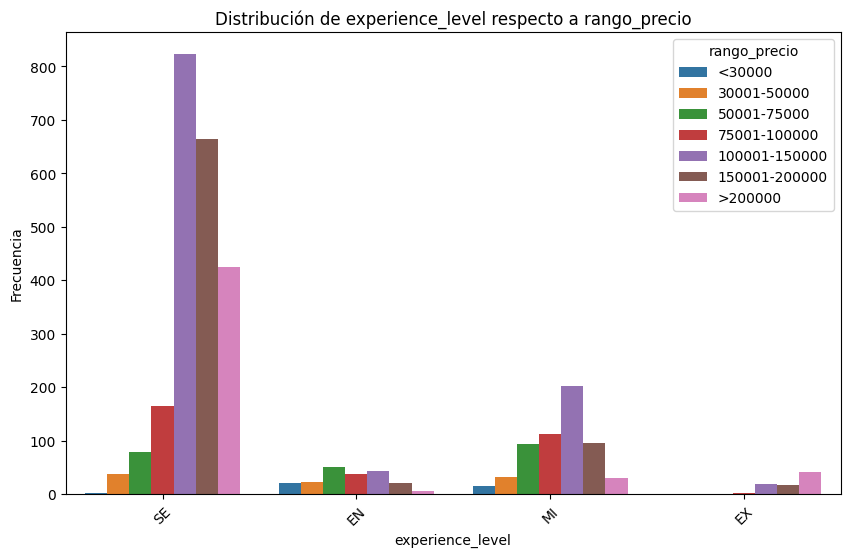

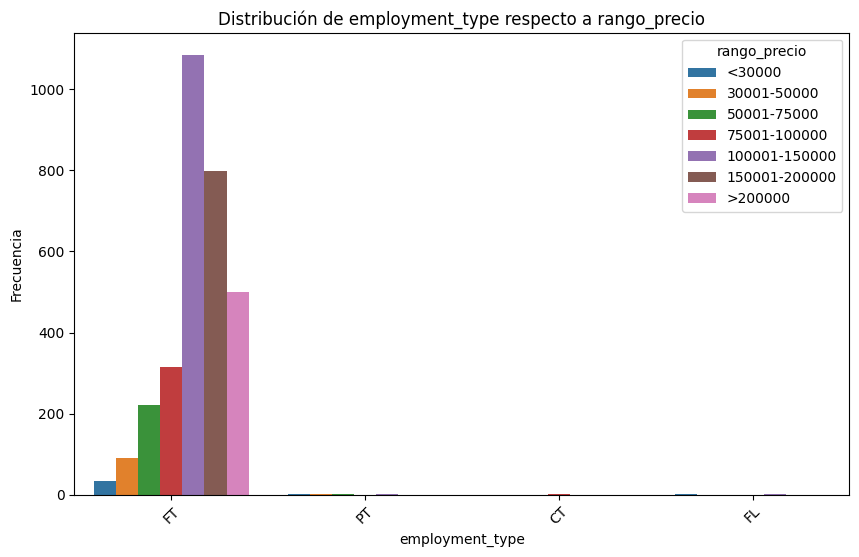

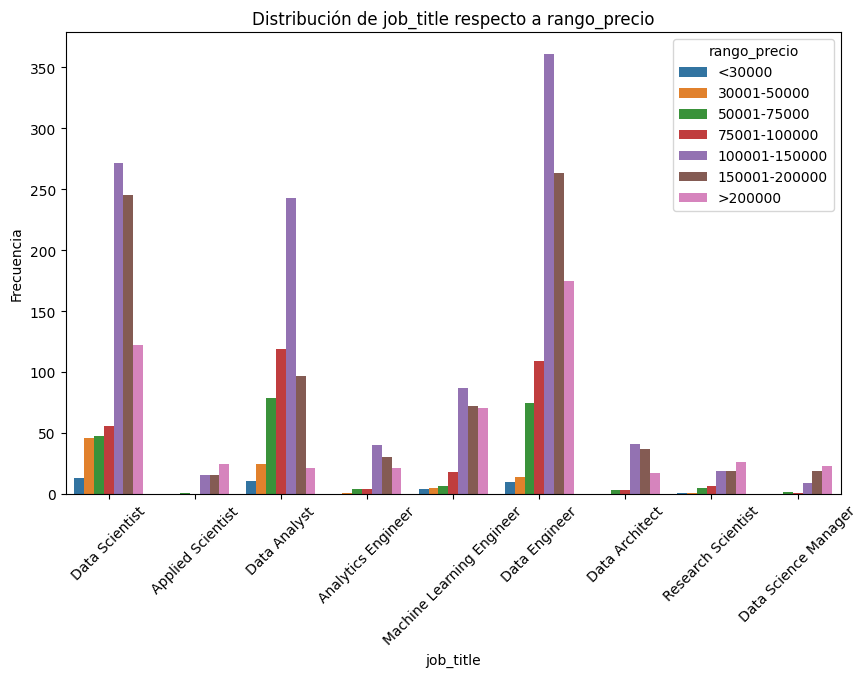

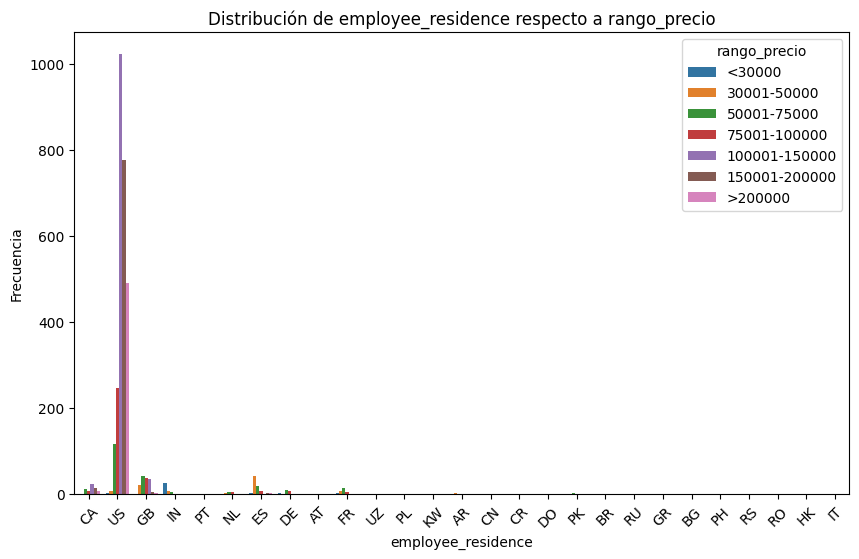

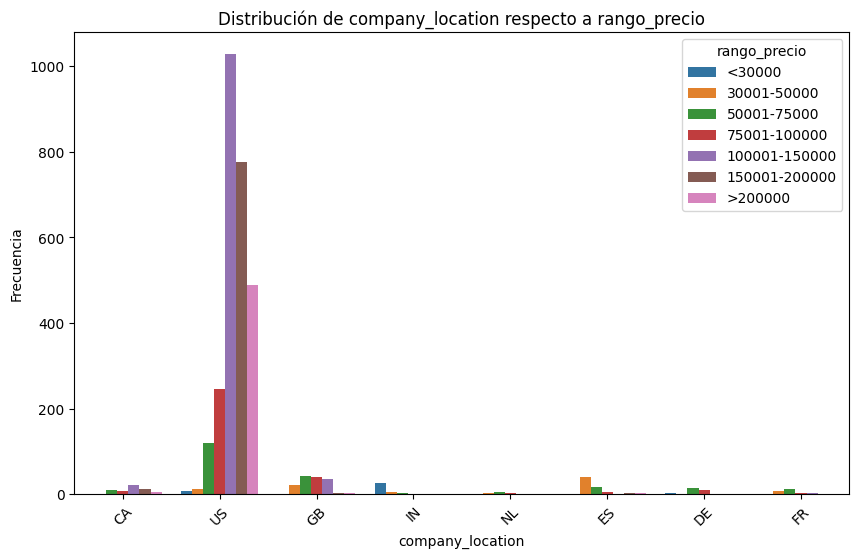

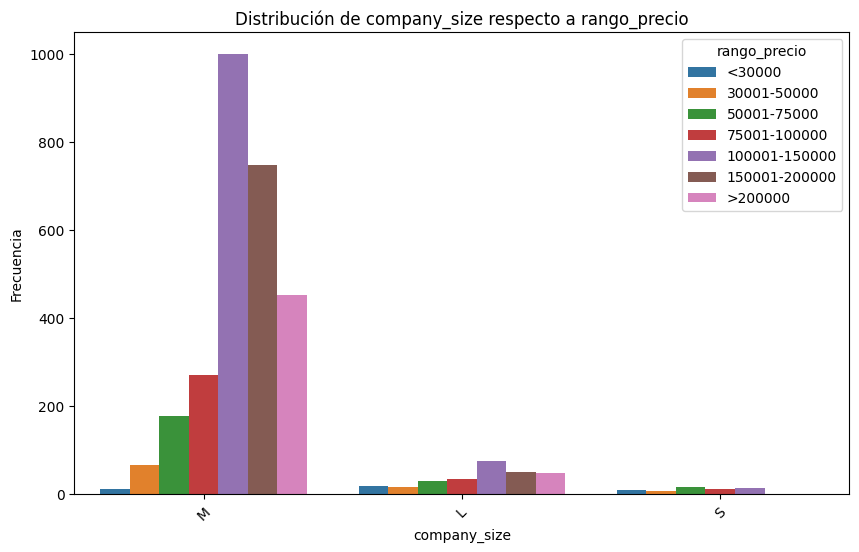

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


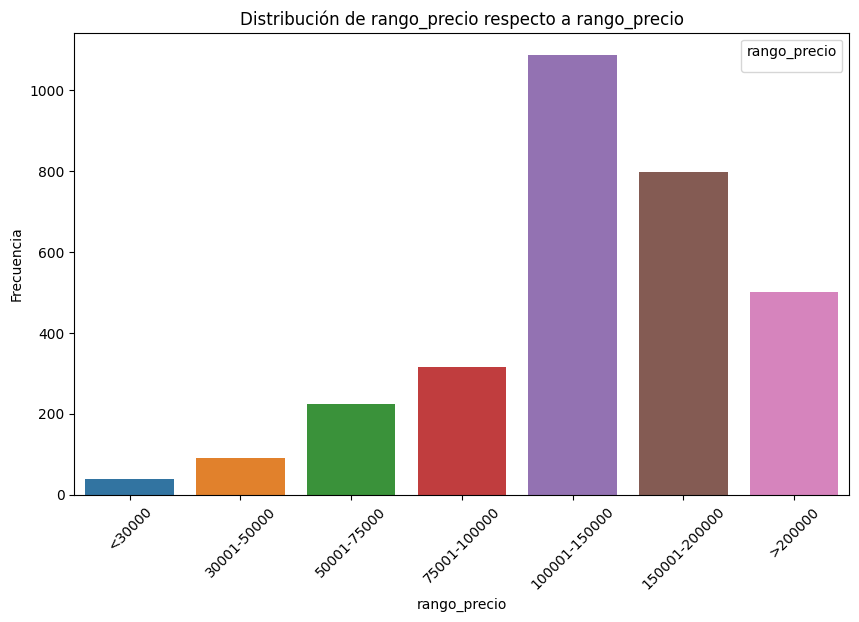

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size',
 'rango_precio']

In [207]:
tb.plot_features_cat_classification (df_salarios, 'rango_precio')

In [208]:
df = pd.read_csv('Data_2/ds_salaries.csv')

In [209]:
df_ds = df.loc[df['job_title'] == 'Data Scientist']

In [210]:
df_ds

work_year experience_level employment_type       job_title  salary  \
3          2023               SE              FT  Data Scientist  175000   
4          2023               SE              FT  Data Scientist  120000   
7          2023               SE              FT  Data Scientist  219000   
8          2023               SE              FT  Data Scientist  141000   
9          2023               SE              FT  Data Scientist  147100   
...         ...              ...             ...             ...     ...   
3741       2020               MI              FT  Data Scientist  118000   
3742       2020               MI              FT  Data Scientist  138350   
3746       2021               MI              FT  Data Scientist  160000   
3750       2020               SE              FT  Data Scientist  412000   
3752       2020               EN              FT  Data Scientist  105000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3                USD         175000                 CA           100   
4                USD         120000                 CA           100   
7                USD         219000                 CA             0   
8                USD         141000                 CA             0   
9                USD         147100                 US             0   
...              ...            ...                ...           ...   
3741             USD         118000                 US           100   
3742             USD         138350                 US           100   
3746             SGD         119059                 SG           100   
3750             USD         412000                 US           100   
3752             USD         105000                 US           100   

     company_location company_size  
3                  CA            M  
4                  CA            M  
7                  CA            M  
8                  CA            M  
9                  US            M  
...               ...          ...  
3741               US            M  
3742               US            M  
3746               IL            M  
3750               US            L  
3752               US            S  

[840 rows x 11 columns]

In [211]:
df_ds = df_ds.drop (['salary', 'salary_currency'], axis=1)

In [212]:
df_ds

work_year experience_level employment_type       job_title  \
3          2023               SE              FT  Data Scientist   
4          2023               SE              FT  Data Scientist   
7          2023               SE              FT  Data Scientist   
8          2023               SE              FT  Data Scientist   
9          2023               SE              FT  Data Scientist   
...         ...              ...             ...             ...   
3741       2020               MI              FT  Data Scientist   
3742       2020               MI              FT  Data Scientist   
3746       2021               MI              FT  Data Scientist   
3750       2020               SE              FT  Data Scientist   
3752       2020               EN              FT  Data Scientist   

      salary_in_usd employee_residence  remote_ratio company_location  \
3            175000                 CA           100               CA   
4            120000                 CA           100               CA   
7            219000                 CA             0               CA   
8            141000                 CA             0               CA   
9            147100                 US             0               US   
...             ...                ...           ...              ...   
3741         118000                 US           100               US   
3742         138350                 US           100               US   
3746         119059                 SG           100               IL   
3750         412000                 US           100               US   
3752         105000                 US           100               US   

     company_size  
3               M  
4               M  
7               M  
8               M  
9               M  
...           ...  
3741            M  
3742            M  
3746            M  
3750            L  
3752            S  

[840 rows x 9 columns]

In [213]:
categoricas = ['experience_level',	'employment_type',	'job_title', 'employee_residence', 'company_location',	'company_size']

In [214]:
le = LabelEncoder()

for col in categoricas:
    df_ds[col] = le.fit_transform(df_ds[col])

RMSE: 47735.51566179799
MAE: 36999.71229413786


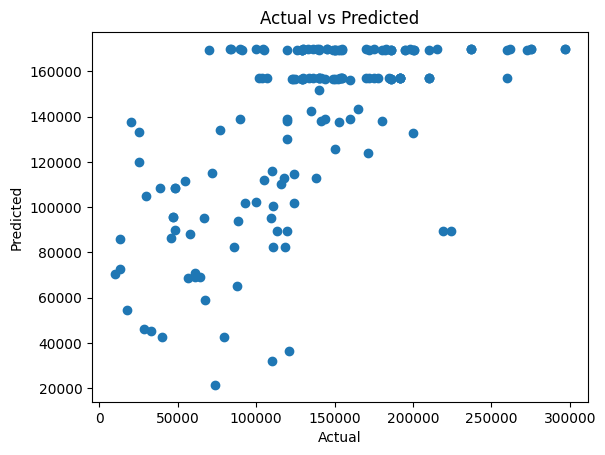

(47735.51566179799, 36999.71229413786)

In [215]:
X = df_ds.drop ('salary_in_usd', axis=1)
y = df_ds['salary_in_usd']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

tb.eval_model (y_test, pred, 'regression', ['RMSE', 'MAE', 'GRAPH'])